<a href="https://colab.research.google.com/github/Felipe-Oliveira11/Hyperparameter-Optimization-/blob/master/Hyperparameter_Tuning_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hyperparameter Tuning 
<br>


O tuning de hiperparâmetros é uma etapa importanssíma, na criação de modelos de Machine learning e o objetivo é encontrar a melhor combinação de valores, para que o modelo alcance o seu potencial máximo em determinado problema. 


<p align=center>
<img src="https://chrisalbon.com/images/machine_learning_flashcards/Hyperparameter_Tuning_print.png" width="60%"></p>


<hr>
<br>




In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# dados 
path = '/content/drive/My Drive/Inteligência Artificial - Colab/ML- Supervisionado /Random Forest /data.csv'
data = pd.read_csv(path)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Modelagem 
data.drop('id', axis=1, inplace=True)
data.drop('Unnamed: 32', axis=1, inplace=True)

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)


# encoding 
label = LabelEncoder()
y_train = label.fit_transform(y_train)
y_test = label.transform(y_test)


# Standard 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



mdl = RandomForestClassifier(n_estimators=100, random_state=42)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



### GridSearchCV

<hr>

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
# modelo 
mdl = RandomForestClassifier()


# parâmetros estimados 
params = {'n_estimators':[100,300,400,800,1000],
          'max_depth':[5,8,12,15,16],
          'min_samples_leaf':[2,4,6,10,12],
          'max_features':[3,5,8,12,14]
         }

In [7]:
# Grid Search 

grid = GridSearchCV(mdl, param_grid=params, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [8]:
# Cross Validation resultados 
pd.DataFrame(grid.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.132396,0.004404,0.006898,0.000145,5,3,2,100,"{'max_depth': 5, 'max_features': 3, 'min_sampl...",0.9500,0.95,0.9625,0.949367,0.924051,0.947184,0.012573,190
1,0.409605,0.011071,0.021067,0.002363,5,3,2,300,"{'max_depth': 5, 'max_features': 3, 'min_sampl...",0.9250,0.95,0.9750,0.936709,0.936709,0.944684,0.017100,269
2,0.533534,0.014282,0.028011,0.002653,5,3,2,400,"{'max_depth': 5, 'max_features': 3, 'min_sampl...",0.9375,0.95,0.9625,0.936709,0.949367,0.947215,0.009495,152
3,1.056188,0.003252,0.055708,0.002279,5,3,2,800,"{'max_depth': 5, 'max_features': 3, 'min_sampl...",0.9500,0.95,0.9625,0.936709,0.949367,0.949715,0.008160,98
4,1.352621,0.016015,0.066756,0.001419,5,3,2,1000,"{'max_depth': 5, 'max_features': 3, 'min_sampl...",0.9500,0.95,0.9625,0.936709,0.936709,0.947184,0.009694,190


In [9]:
# Pontuação média no CV 
grid.best_score_

0.959746835443038

In [10]:
# Melhor modelo GridSearch 
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=16, max_features=12,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
# melhores parâmetros 
grid.best_params_

{'max_depth': 16,
 'max_features': 12,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [12]:
# número de CV Folds
grid.n_splits_

5

In [13]:
# Avaliando pós tuning 
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



<hr>
<br>

<br>

### Randomized Search 

Outra técnica de tuning com busca aleatória. Usando a busca por distribuição dos parâmetros.

In [14]:
from sklearn.model_selection import RandomizedSearchCV

In [15]:
# modelo 

mdl = RandomForestClassifier(random_state=42)

In [16]:
# parâmetros 

search_params = {
          'n_estimators': stats.randint(100,2000),
          'criterion': ['gini', 'entropy'], 
          'max_depth': stats.randint(1,20),
          'min_samples_leaf': stats.randint(1, 18),
          'max_features': stats.randint(1,30),
          'min_impurity_decrease': stats.uniform(0.01, 0.20)
          }

In [17]:
# Random Search tuning 
searchGrid = RandomizedSearchCV(mdl, param_distributions=search_params, cv=5, scoring='accuracy', random_state=42)

In [18]:
# treinamento 
searchGrid.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [19]:
# Validação cruzada resultados 
pd.DataFrame(searchGrid.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_impurity_decrease,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.335971,0.006065,0.014502,0.000440,gini,15,11,0.165938,7,221,"{'criterion': 'gini', 'max_depth': 15, 'max_fe...",0.9500,0.9375,0.9250,0.873418,0.898734,0.916930,0.027591,10
1,1.473568,0.012718,0.067365,0.003526,gini,11,11,0.183235,4,971,"{'criterion': 'gini', 'max_depth': 11, 'max_fe...",0.9375,0.9375,0.9250,0.886076,0.898734,0.916962,0.020950,9
2,4.331448,0.069904,0.116502,0.022951,entropy,3,22,0.0212823,12,1537,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.9500,0.9125,0.9375,0.924051,0.949367,0.934684,0.014583,2
3,4.204748,0.055225,0.095395,0.003397,entropy,2,28,0.0466809,12,1437,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.9375,0.9000,0.9250,0.924051,0.949367,0.927184,0.016444,7
4,4.888185,0.090344,0.104550,0.000831,entropy,12,25,0.0682458,10,1599,"{'criterion': 'entropy', 'max_depth': 12, 'max...",0.9375,0.9000,0.9250,0.924051,0.949367,0.927184,0.016444,7


In [20]:
# melhor modelo 
searchGrid.best_estimator_ 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features=28,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.03440764696895577,
                       min_impurity_split=None, min_samples_leaf=8,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=134, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [21]:
# melhores parâmetros 
searchGrid.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 28,
 'min_impurity_decrease': 0.03440764696895577,
 'min_samples_leaf': 8,
 'n_estimators': 134}

In [22]:
# melhor score 
searchGrid.best_score_

0.9422468354430379

In [23]:
# Avaliando pós tuning 
y_pred = searchGrid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



<hr>
<br>
<br>

### Skopt 

Otimização com Scikit-optimize 

<hr>


In [24]:
!pip install scikit-optimize

In [25]:
from skopt import dummy_minimize
from lightgbm import LGBMClassifier

In [26]:
def treinar_modelo(params):
    # hiperparâmetros 
    learning_rate = params[0]
    num_leaves = params[1]
    min_child_samples = params[2]
    subsample = params[3]
    colsample_bytree = params[4]
    
    print(params)
    print('\n')

    # modelo
    mdl = LGBMClassifier(learning_rate=learning_rate, num_leaves=num_leaves, min_child_samples=min_child_samples,
                         subsample=subsample, colsample_bytree=colsample_bytree ,random_state=42, subsample_freq=1, n_estimators=100, bagging_freq=1,
                         feature_fraction=0.8)
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)

    # minimizar a função (inversa da métrica)
    return -accuracy_score(y_test, y_pred)



# Intervalo de distribuições 

space = [(1e-3, 1e-1, 'log-uniform'), # learning rate
         (2,120), # num_leaves
         (1,100), # min_child_samples
         (0.05, 1.0), # subsample 
         (0.1, 1.0)] # colsample_bytree


resultados = dummy_minimize(treinar_modelo, space, random_state=42, verbose=1, n_calls=30)

Iteration No: 1 started. Evaluating function at random point.
[0.03918194347141743, 16, 72, 0.6187255599871848, 0.2404167763981929]


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0266
Function value obtained: -0.9591
Current minimum: -0.9591
Iteration No: 2 started. Evaluating function at random point.
[0.002051110418843398, 76, 75, 0.8728673384861885, 0.6410035105688879]


Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0359
Function value obtained: -0.6316
Current minimum: -0.9591
Iteration No: 3 started. Evaluating function at random point.
[0.026070247583707674, 23, 53, 0.9714143595538948, 0.8491983767203797]


Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0350
Function value obtained: -0.9591
Current minimum: -0.9591
Iteration No: 4 started. Evaluating function at random point.
[0.0026587543983272693, 65, 60, 0.22423428436076215, 0.373818018663584]


Iteration No: 4 ended. Evaluation done at random point.
Time 

In [27]:
# Melhores hiperparâmetros 
resultados.x

[0.0852139338138361, 61, 41, 0.3314598304188783, 0.24874024515670226]

In [28]:
# Acurácia = 0.9766 | [0.0852139338138361, 61, 41, 0.3314598304188783, 0.24874024515670226]


<br>
<hr>


### Bayesian Optimization 

Técnica mais robusta de Otimização, a otmização bayesiana faz uma busca aleatória nas distribuições passadas, e treina o modelo para entender como a função que queremos otimizar varia conforme os parâmetros.


Temos uma busca mais guiada, buscando áreas para minimizar mais a função objetivo, há pesos maiores para determinados parâmetros, consigo buscar espaços com diferentes pesos para otimizar os hiperparâmetros. 


<b> Cria modelos de hiperpâmetros, prevendo os valores da função que desejamos minimizar, e vai selecionar o ponto mais promissor na distribuição, qual a combinação de hiperparâmetros é a mais promissora, para se testar. </b>

* Vai encontrar parâmetros com mais importância que outros, e vai buscar mais a fundo esses parâmetros.  

In [29]:
from skopt import gp_minimize 

In [30]:
resultados_gp = gp_minimize(treinar_modelo, space, random_state=42, verbose=1, n_calls=30, n_random_starts=10) # parâmetro n_random_starts

Iteration No: 1 started. Evaluating function at random point.
[0.03918194347141743, 24, 78, 0.6170076500491628, 0.5012494775682321]


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0232
Function value obtained: -0.9708
Current minimum: -0.9708
Iteration No: 2 started. Evaluating function at random point.
[0.0015847101210439095, 56, 34, 0.18572347702584374, 0.6857996256539677]


Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0179
Function value obtained: -0.6316
Current minimum: -0.9708
Iteration No: 3 started. Evaluating function at random point.
[0.00129665117537604, 87, 94, 0.05073982754896361, 0.992990403362096]


Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0104
Function value obtained: -0.6316
Current minimum: -0.9708
Iteration No: 4 started. Evaluating function at random point.
[0.017177621112338382, 74, 2, 0.07190930378934497, 0.5722971942325503]


Iteration No: 4 ended. Evaluation done at random point.
Time 

In [31]:
# Melhores parâmetros 
resultados_gp.x

[0.1, 120, 100, 0.6588573370313334, 0.1892240398266101]

In [32]:
# Acurácia: 0.9766 | [0.1, 120, 100, 0.6588573370313334, 0.1892240398266101]

<hr>
<br>


#### Random Search X Bayesian Optimization 

comparação de resultados e desempenho das duas técnicas

In [33]:
from skopt.plots import plot_convergence

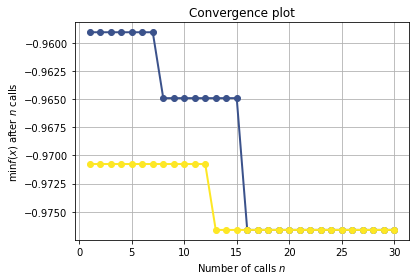

In [34]:
# Comparação 
plot_convergence(resultados, resultados_gp)


Random Search (azul)
Bayesian Optmization (amarelo)

Comparando a Random Search com Bayesian Optimization, neste caso ambos encontraram o mesmo valor mínimo da função que otimizamos (acurácia), mas a Otimização Bayesiana, convergiu com o mínimo de forma bem mais rápida que a Random Search. 